In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler

In [231]:
df = pd.read_csv('../data/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [232]:
df.shape

(319795, 18)

## Tratamento de dados

### Substituindo os valores string por numéricos


In [233]:
df['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['Smoking'].replace({'No':0,'Yes':1}, inplace=True)

df['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)

df['Stroke'].replace({'No':0,'Yes':1}, inplace=True)

df['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)

df['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)

df['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)

df['Asthma'].replace({'No':0,'Yes':1}, inplace=True)

df['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)

df['Sex'].replace({'Male':0,'Female':1}, inplace=True)

df['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)

df['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)

df['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)

C:\Users\muril\AppData\Local\Temp\ipykernel_10996\3385807307.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)
C:\Users\muril\AppData\Local\Temp\ipykernel_10996\3385807307.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HeartDiseas

In [234]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,1,8.0,0,0,0


In [235]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.524727,6.514536,0.540897,0.135590,0.775362,1.404972,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.192394,0.342353,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,1.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [236]:
train, test = train_test_split(df,stratify=df['HeartDisease'],test_size=.2,random_state=0)

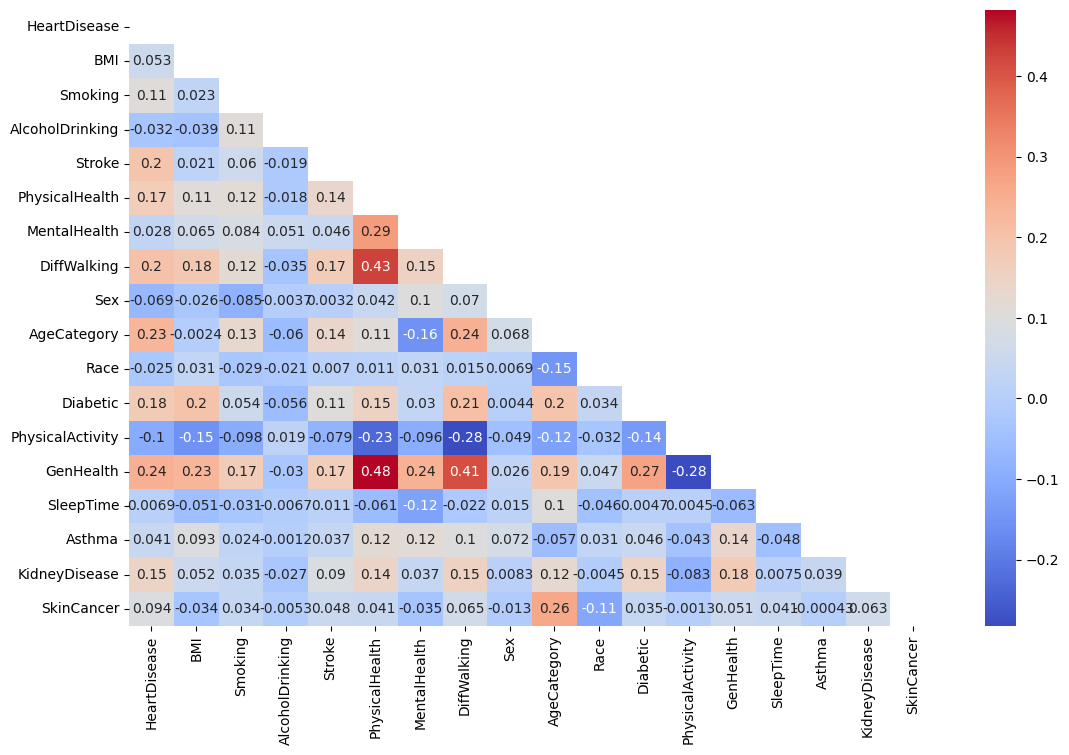

In [237]:
plt.figure(figsize=(13,8))
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
sns.heatmap(train.corr(), mask=mask, cmap='coolwarm', annot=True)
plt.show()

In [238]:
df.drop('BMI', axis=1)
df.drop('AlcoholDrinking', axis=1)
df.drop('MentalHealth', axis=1)
df.drop('Sex', axis=1)
df.drop('Race', axis=1)
df.drop('PhysicalActivity', axis=1)
df.drop('SleepTime', axis=1)
df.drop('Asthma', axis=1)
df.drop('SkinCancer', axis=1)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,1,5.0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,1,7.0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,3,8.0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,1,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,8,1,1,0,3,6.0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,3,1,0,1,1,5.0,1,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,5,1,0,1,2,6.0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,1,1,0,0,2,12.0,0,0


In [239]:
train_corr = train.corr()
train_corr[(train_corr > 0.2) & (train_corr < 1.0)].stack()

HeartDisease    DiffWalking       0.203615
                AgeCategory       0.233009
                GenHealth         0.243702
BMI             GenHealth         0.232758
PhysicalHealth  MentalHealth      0.287765
                DiffWalking       0.427359
                GenHealth         0.482381
MentalHealth    PhysicalHealth    0.287765
                GenHealth         0.242048
DiffWalking     HeartDisease      0.203615
                PhysicalHealth    0.427359
                AgeCategory       0.244766
                Diabetic          0.210130
                GenHealth         0.413318
AgeCategory     HeartDisease      0.233009
                DiffWalking       0.244766
                SkinCancer        0.263627
Diabetic        DiffWalking       0.210130
                GenHealth         0.271059
GenHealth       HeartDisease      0.243702
                BMI               0.232758
                PhysicalHealth    0.482381
                MentalHealth      0.242048
           

C:\Users\muril\AppData\Local\Temp\ipykernel_10996\959313376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train['Diabetic'],y=train['BMI'],linewidth=1,palette='Set3')
C:\Users\muril\AppData\Local\Temp\ipykernel_10996\959313376.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train['GenHealth'],y=train['BMI'],linewidth=1,palette='Set3')


ValueError: The following variable cannot be assigned with wide-form data: `hue`

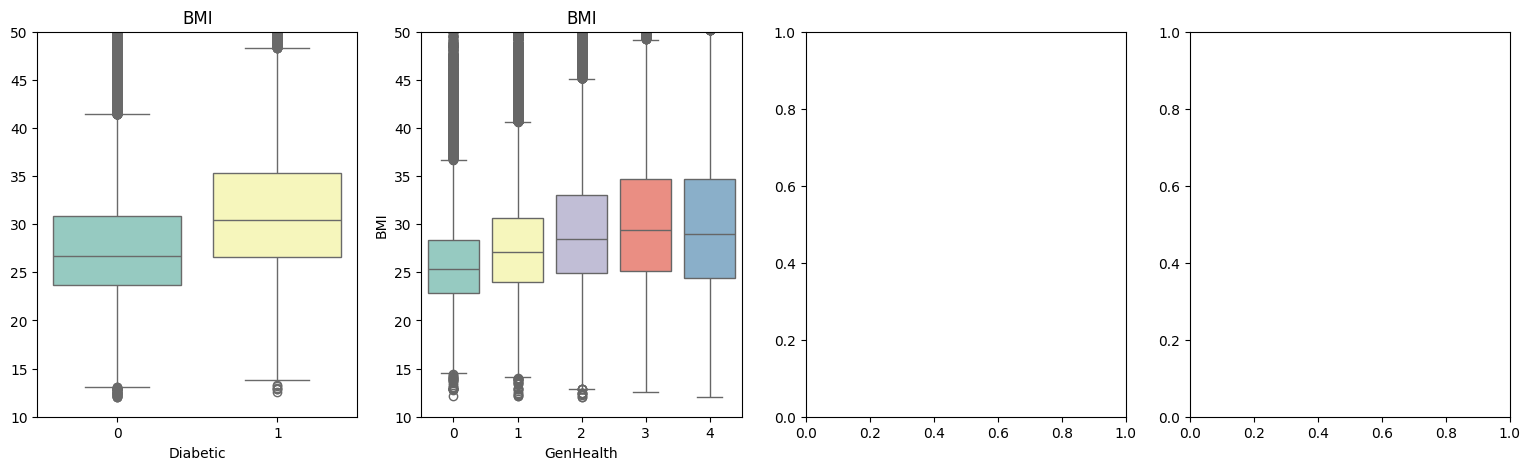

In [240]:
plt.subplots(1,4,figsize=(19,5))
plt.subplot(1,4,1)
sns.boxplot(x=train['Diabetic'],y=train['BMI'],linewidth=1,palette='Set3')
plt.ylim(ymin=10,ymax=50)
plt.title('BMI')
plt.ylabel('')
plt.subplot(1,4,2)
sns.boxplot(x=train['GenHealth'],y=train['BMI'],linewidth=1,palette='Set3')
plt.title('BMI')
plt.ylim(ymin=10,ymax=50)
plt.subplot(1,4,3)
sns.countplot(train['AgeCategory'], hue=train['DiffWalking'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.ylabel('')
plt.title('DiffWalking')
plt.subplot(1,4,4)
sns.countplot(train['Diabetic'], hue=train['DiffWalking'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.ylabel('')
plt.title('DiffWalking')

plt.show()

### Tratamento de outliers

In [241]:
def outlier(df, size, columns=None):
    if columns == None:
        columns = df.columns
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        border = np.abs(df[col] - mean) / std
        
        df = df[(border < size)]
    
    return df

In [242]:
print(test.shape)
test = outlier(test, 3, ['SleepTime'])
print(test.shape)
test = outlier(test, 1.9, ['BMI'])
print(test.shape)
test = outlier(test, 1.2, ['PhysicalHealth'])
print(test.shape)
test = outlier(test, 1.2, ['MentalHealth'])
print(test.shape)

(63959, 18)
(63043, 18)
(59793, 18)
(54007, 18)
(48968, 18)


In [243]:
print(train.shape)
train = outlier(train, 3, ['SleepTime'])
print(train.shape)
train = outlier(train, 1.9, ['BMI'])
print(train.shape)
train = outlier(train, 1.2, ['PhysicalHealth'])
print(train.shape)
train = outlier(train, 1.2, ['MentalHealth'])
print(train.shape)

(255836, 18)
(252209, 18)
(239853, 18)
(216503, 18)
(196479, 18)


C:\Users\muril\AppData\Local\Temp\ipykernel_10996\2397159955.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train['SleepTime'],linewidth=1,palette='Set2')
C:\Users\muril\AppData\Local\Temp\ipykernel_10996\2397159955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train['BMI'],linewidth=1,palette='Set2')
C:\Users\muril\AppData\Local\Temp\ipykernel_10996\2397159955.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train['PhysicalHealth'],linewidth=1,palette='Set2')
C:\Users\muril\AppData\Local\Temp\ipykernel_10996\2397159955.py:10: 

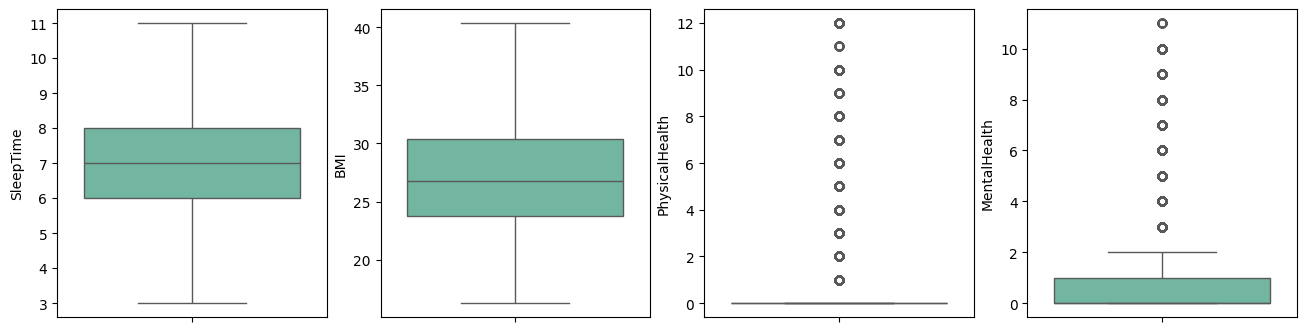

In [244]:
plt.subplots(1,4,figsize=(16,4))

plt.subplot(141)
sns.boxplot(train['SleepTime'],linewidth=1,palette='Set2')
plt.subplot(142)
sns.boxplot(train['BMI'],linewidth=1,palette='Set2')
plt.subplot(143)
sns.boxplot(train['PhysicalHealth'],linewidth=1,palette='Set2')
plt.subplot(144)
sns.boxplot(train['MentalHealth'],linewidth=1,palette='Set2')
plt.show()

In [245]:
train['Physical_MentalHealth'] = train['PhysicalHealth'] + train['MentalHealth']
test['Physical_MentalHealth'] = test['PhysicalHealth'] + test['MentalHealth']

In [246]:
train['PhysicalHealth_log'] = np.log1p(train['PhysicalHealth'])
train['MentalHealth_log'] = np.log1p(train['MentalHealth'])

In [247]:
test['PhysicalHealth_log'] = np.log1p(test['PhysicalHealth'])
test['MentalHealth_log'] = np.log1p(test['MentalHealth'])

In [248]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Physical_MentalHealth,PhysicalHealth_log,MentalHealth_log
131927,1,30.13,1,0,0,0.0,0.0,0,0,12,...,1,0,3,7.0,0,0,0,0.0,0.0,0.0
292375,0,35.51,0,0,1,0.0,0.0,0,1,4,...,0,1,2,7.0,1,0,0,0.0,0.0,0.0
292538,0,24.89,0,1,0,0.0,0.0,0,1,4,...,0,1,1,7.0,0,0,0,0.0,0.0,0.0
100928,0,26.50,1,0,0,0.0,0.0,0,0,5,...,0,1,1,7.0,0,0,0,0.0,0.0,0.0
74077,0,21.97,0,0,0,0.0,0.0,0,1,7,...,0,1,2,8.0,0,0,0,0.0,0.0,0.0


In [249]:
y_train = train['HeartDisease']
X_train = train.drop('HeartDisease',axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=train['HeartDisease'], test_size=.2, random_state=1205)

y_test = test['HeartDisease']
X_test = test.drop('HeartDisease', axis=1)

In [250]:
X_train.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Physical_MentalHealth,PhysicalHealth_log,MentalHealth_log
302267,25.75,0,0,0,0.0,0.0,0,1,4,0,0,1,2,8.0,0,0,0,0.0,0.000000,0.0
192452,30.68,1,0,0,10.0,0.0,0,0,5,1,1,0,2,9.0,0,1,0,10.0,2.397895,0.0
36019,31.47,0,0,0,0.0,0.0,0,1,2,0,0,1,1,7.0,1,0,0,0.0,0.000000,0.0
302807,23.75,0,0,0,5.0,0.0,0,0,10,0,0,1,2,7.0,0,1,1,5.0,1.791759,0.0
46455,23.49,0,0,0,0.0,0.0,0,0,12,0,0,1,1,8.0,0,0,0,0.0,0.000000,0.0


## Treinamento do Modelo

In [251]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

In [252]:
df = pd.read_csv('../data/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [253]:
df['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['Smoking'].replace({'No':0,'Yes':1}, inplace=True)

df['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)

df['Stroke'].replace({'No':0,'Yes':1}, inplace=True)

df['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)

df['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)

df['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)

df['Asthma'].replace({'No':0,'Yes':1}, inplace=True)

df['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)

df['Sex'].replace({'Male':0,'Female':1}, inplace=True)

df['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)

df['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)

df['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)

C:\Users\muril\AppData\Local\Temp\ipykernel_10996\3385807307.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)
C:\Users\muril\AppData\Local\Temp\ipykernel_10996\3385807307.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HeartDiseas

In [254]:
print(test.shape)
test = outlier(test, 3, ['SleepTime'])
print(test.shape)
test = outlier(test, 1.9, ['BMI'])
print(test.shape)
test = outlier(test, 1.2, ['PhysicalHealth'])
print(test.shape)
test = outlier(test, 1.2, ['MentalHealth'])
print(test.shape)

(48968, 21)
(48759, 21)
(45922, 21)
(41298, 21)
(36466, 21)


In [255]:
print(train.shape)
train = outlier(train, 3, ['SleepTime'])
print(train.shape)
train = outlier(train, 1.9, ['BMI'])
print(train.shape)
train = outlier(train, 1.2, ['PhysicalHealth'])
print(train.shape)
train = outlier(train, 1.2, ['MentalHealth'])
print(train.shape)

(196479, 21)
(195666, 21)
(184245, 21)
(165964, 21)
(146808, 21)


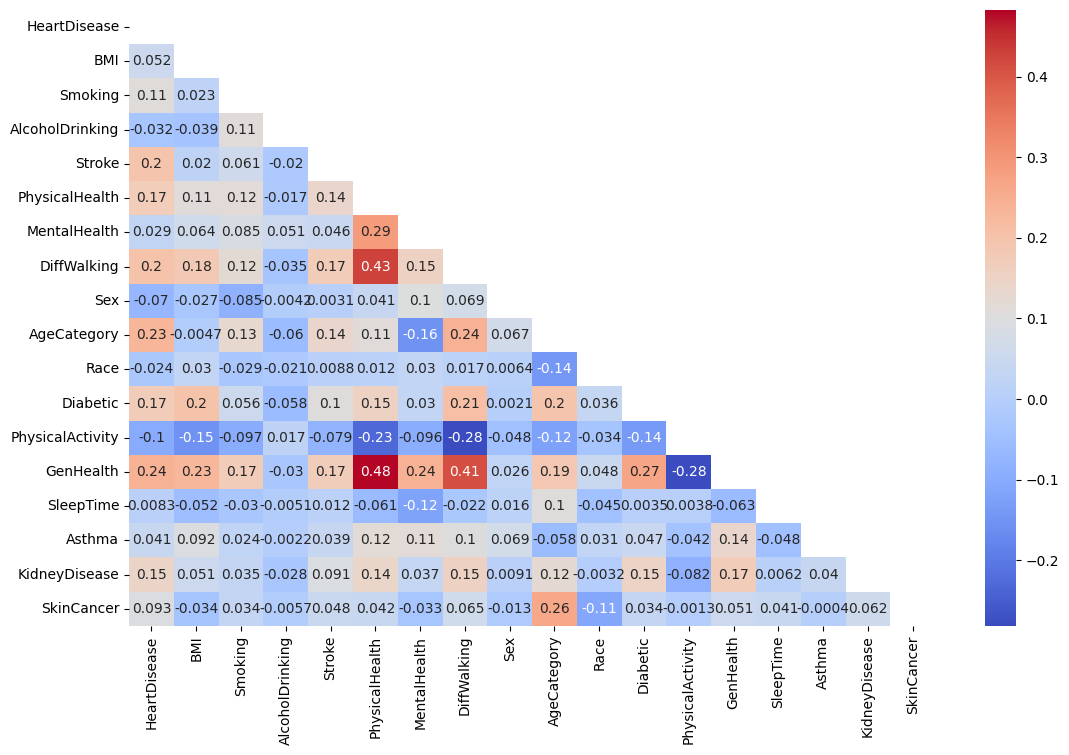

In [256]:
plt.figure(figsize=(13,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, cmap='coolwarm', annot=True)
plt.show()

In [257]:
df.drop('BMI', axis=1, inplace=True)
df.drop('AlcoholDrinking', axis=1, inplace=True)
df.drop('MentalHealth', axis=1, inplace=True)
df.drop('Sex', axis=1, inplace=True)
df.drop('Race', axis=1, inplace=True)
df.drop('PhysicalActivity', axis=1, inplace=True)
df.drop('SleepTime', axis=1, inplace=True)
df.drop('Asthma', axis=1, inplace=True)
df.drop('SkinCancer', axis=1, inplace=True)

df.head()

,HeartDisease,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,GenHealth,KidneyDisease
0,0,1,0,3.0,0,7,1,1,0
1,0,0,1,0.0,0,12,0,1,0
2,0,1,0,20.0,0,9,1,3,0
3,0,0,0,0.0,0,11,0,2,0
4,0,0,0,28.0,1,4,0,1,0


In [258]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
X_train

,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,GenHealth,KidneyDisease
95877,1,0,0.0,0,11,0,1,0
228939,1,1,30.0,0,7,0,2,0
260256,0,0,2.0,0,6,0,1,0
84785,0,0,0.0,0,1,0,0,0
83845,1,0,2.0,0,12,1,2,0
...,...,...,...,...,...,...,...,...
119879,0,0,0.0,0,8,0,2,0
259178,1,0,0.0,0,3,0,2,0
131932,1,0,12.0,0,9,0,1,0
146867,0,0,7.0,0,0,0,0,0


In [261]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [262]:
X_train_scaled

array([[ 1.1935544 , -0.19722674, -0.42351474, ..., -0.39634541,
        -0.38802615, -0.19563841],
       [ 1.1935544 ,  5.07030641,  3.3547987 , ..., -0.39634541,
         0.5701702 , -0.19563841],
       [-0.83783362, -0.19722674, -0.17162718, ..., -0.39634541,
        -0.38802615, -0.19563841],
       ...,
       [ 1.1935544 , -0.19722674,  1.08781064, ..., -0.39634541,
        -0.38802615, -0.19563841],
       [-0.83783362, -0.19722674,  0.45809173, ..., -0.39634541,
        -1.34622251, -0.19563841],
       [ 1.1935544 , -0.19722674, -0.42351474, ..., -0.39634541,
         0.5701702 , -0.19563841]])

In [263]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [264]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [265]:
history = model.fit(X_train_scaled, y_train, 
                    epochs=10,              
                    batch_size=50,            
                    verbose=1)

Epoch 1/10
5117/5117 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9151 - loss: 0.2480
Epoch 2/10
5117/5117 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9156 - loss: 0.2322
Epoch 3/10
5117/5117 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9152 - loss: 0.2325
Epoch 4/10
5117/5117 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9148 - loss: 0.2335
Epoch 5/10
5117/5117 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9161 - loss: 0.2308
Epoch 6/10
5117/5117 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9166 - loss: 0.2291
Epoch 7/10
5117/5117 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9158 - loss: 0.2309
Epoch 8/10
5117/5117 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9149 - loss: 0.2325
Epoch 9/10
5117/5117 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9154 - loss: 0.2315
Epoch 10/10
5117/5117 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9147 - loss: 0.2327
